# 주성분을 사용해 특성 줄이기

In [69]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import datasets

In [70]:
digits = datasets.load_digits()

In [71]:
features = StandardScaler().fit_transform(digits.data)

In [72]:
pca = PCA(n_components=0.99, whiten=True) 

In [73]:
features_pca = pca.fit_transform(features)

In [74]:
# 결과를 확인합니다.
print("원본 특성 개수:", features.shape[1])
print("줄어든 특성 개수:", features_pca.shape[1])

원본 특성 개수: 64
줄어든 특성 개수: 54


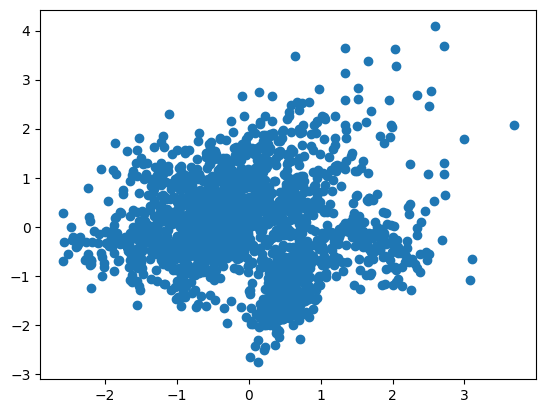

In [75]:
import matplotlib.pyplot as plt

plt.scatter(features_pca[:, 0], features_pca[:, 1])
plt.show()

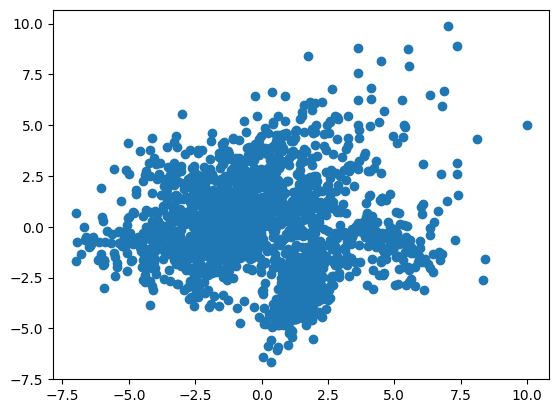

In [76]:
pca_nowhiten = PCA(n_components=0.99)
feature_nowhiten = pca_nowhiten.fit_transform(features)
plt.scatter(feature_nowhiten[:, 0], feature_nowhiten[:, 1])
plt.show()

In [77]:
pca_nowhiten.components_.shape

(54, 64)

In [78]:
feature_nowhiten.shape

(1797, 54)

In [79]:
pca_nowhiten.components_.shape

(54, 64)

In [80]:
features.shape

(1797, 64)

In [85]:
import numpy as np

np.allclose(feature_nowhiten, np.dot(features, pca_nowhiten.components_.T))

True

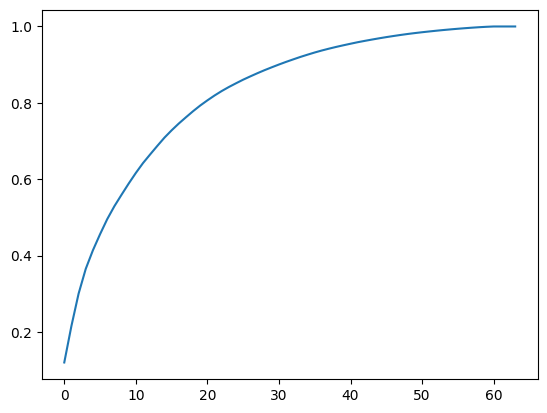

In [24]:
pca = PCA(whiten=True).fit(features)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.show()

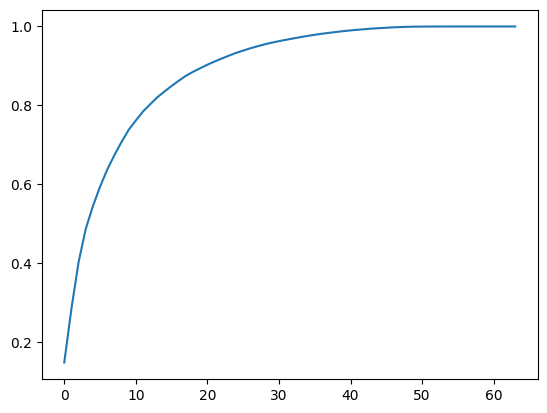

In [25]:
# 표준화하지 않은 원본 데이터를 사용합니다.
pca.fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.show()

# 선형적으로 구분되지 않은 데이터의 차원 축소하기

In [26]:
from sklearn.decomposition import KernelPCA
from sklearn.datasets import make_circles

In [29]:
features, _ = make_circles(n_samples=1000, random_state=1, noise=0.1, factor=0.1)
kpca = KernelPCA(kernel='rbf', gamma=15, n_components=1)
features_kpca = kpca.fit_transform(features)

In [30]:
# 특성 개수를 출력합니다.
print("원본 특성 개수:", features.shape[1])
print("줄어든 특성 개수:", features_kpca.shape[1])

원본 특성 개수: 2
줄어든 특성 개수: 1


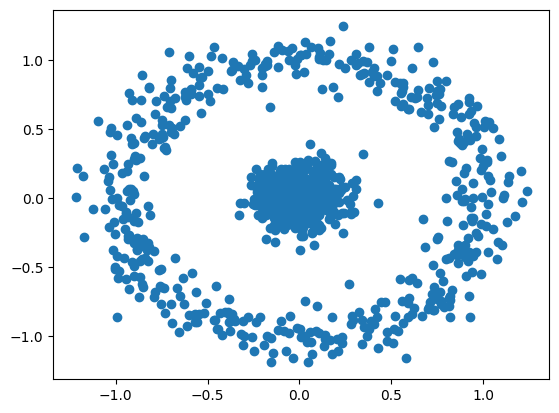

In [32]:
import matplotlib.pyplot as plt

plt.scatter(features[:, 0], features[:, 1])
plt.show()

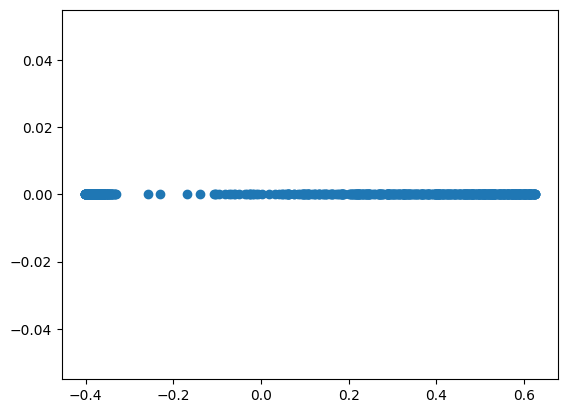

In [34]:
plt.scatter(features_kpca, np.zeros(features_kpca.shape[0]))
plt.show()

# 클래스 분리를 최대화하여 특성 줄이기

In [35]:
from sklearn import datasets
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [36]:
iris = datasets.load_iris()
features = iris.data
target = iris.target

In [43]:
lda = LinearDiscriminantAnalysis(n_components=1)
features_lda = lda.fit(features, target).transform(features)

In [44]:
# 특성 개수를 출력합니다.
print("원본 특성 개수:", features.shape[1])
print("줄어든 특성 개수:", features_lda.shape[1])

원본 특성 개수: 4
줄어든 특성 개수: 1


In [45]:
lda.explained_variance_ratio_

array([0.9912126])

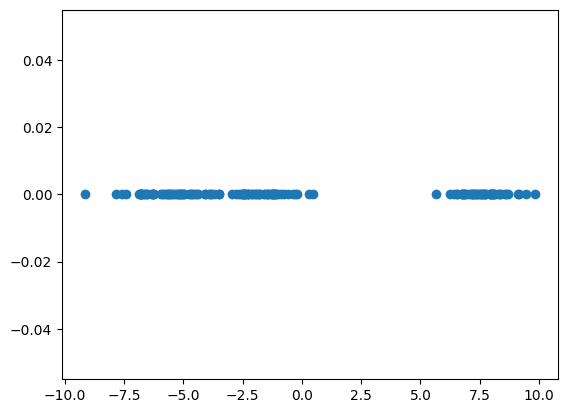

In [46]:
plt.scatter(features_lda, np.zeros(features_lda.shape[0]))
plt.show()

In [53]:
# LDA를 만들고 실행합니다.
lda = LinearDiscriminantAnalysis(n_components=None)
features_lda = lda.fit(features, target)

# 설명된 분산의 비율이 담긴 배열을 저장합니다.
lda_var_ratios = lda.explained_variance_ratio_
print(lda_var_ratios)
# 함수를 만듭니다.
def select_n_components(var_ratio, goal_var: float) -> int:
    # 설명된 분산의 초기값을 지정합니다.
    total_variance = 0.0

    # 특성 개수의 초깃값을 지정합니다.
    n_components = 0

    # 각 특성의 설명된 분산을 순회합니다.
    for explained_variance in var_ratio:

        # 설명된 분산 값을 누적합니다.
        total_variance += explained_variance

        # 성분 개수를 카운트합니다.
        n_components += 1

        # 설명된 분산이 목표치에 도달하면 
        if total_variance >= goal_var:
            # 반복을 종료합니다.
            break

    # 성분 개수를 반환합니다.
    return n_components

# 함수를 실행합니다.
select_n_components(lda_var_ratios, 0.95)

[0.9912126 0.0087874]


1

# 행렬 분해를 사용하여 특성 줄이기

In [54]:
# 라이브러리를 임포트합니다.
from sklearn.decomposition import NMF
from sklearn import datasets

# 데이터를 로드합니다.
digits = datasets.load_digits()

# 특성 행렬을 로드합니다.
features = digits.data

# NMF를 만들고 학습하고 적용합니다.
nmf = NMF(n_components=10, max_iter=1000, random_state=1)
features_nmf = nmf.fit_transform(features)

# 결과를 출력합니다.
print("원본 특성 개수:", features.shape[1])
print("줄어든 특성 개수:", features_nmf.shape[1])

원본 특성 개수: 64
줄어든 특성 개수: 10


In [55]:
nmf.components_.shape

(10, 64)

In [56]:
np.all(nmf.components_ >=0)

True

In [64]:
features.shape

(1797, 64)

In [63]:
features_nmf.shape

(1797, 10)

In [87]:
np.mean(features - np.dot(features_nmf, nmf.components_))

-5.07379225810718

In [88]:
np.mean(features_nmf - np.dot(features, nmf.components_.T))

0.09567112747460402

# 희소한 데이터의 특성 줄이기

In [89]:
# 라이브러리를 임포트합니다.
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import csr_matrix
from sklearn import datasets
import numpy as np

# 데이터를 로드합니다.
digits = datasets.load_digits()

# 특성 행렬을 표준화 처리합니다.
features = StandardScaler().fit_transform(digits.data)

# 희소 행렬을 만듭니다.
features_sparse = csr_matrix(features)

# TSVD 객체를 만듭니다.
tsvd = TruncatedSVD(n_components=10)

# 희소 행렬에 TSVD를 적용합니다.
features_sparse_tsvd = tsvd.fit(features_sparse).transform(features_sparse)

# 결과를 출력합니다.
print("원본 특성 개수:", features_sparse.shape[1])
print("줄어든 특성 개수:", features_sparse_tsvd.shape[1])

원본 특성 개수: 64
줄어든 특성 개수: 10
